## Introduction
with dropout method, it could help to reduce the probability of overfitting.\
This is because we randomly choose to throw 20% neural network to reduce the workload.\
With dropout method, it is smoother than without dropout\
With batch normalization, we can make normalization a part of the model architechture, especially for training mini-batch.
So, we can choose higher learning rate without worring the carefulness of the initialization.

# 1.1 Softmax Regression  (without dropout)

In [ ]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader

def data_transform(x):
     x = np.array(x, dtype = 'float32') / 255
     x = (x - 0.5) /0.5
     x = x.reshape((-1, ))
     x = torch.from_numpy(x)
     return x
 
    
trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)
train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)

class MLP (nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
      
    def forward(self, x):      
        x = F.softmax(self.fc1(x),dim=0)
        return x

mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp.parameters(), 0.001)

losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(30):
    train_loss = 0
    train_acc = 0
       
    mlp.train()
    for im, label in train_data:
        im = Variable(im, requires_grad=True)
        label = Variable(label)
        # 前向传播
        out = mlp(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
        # 计算分类的准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    # 在测试集上检验效果
    eval_loss = 0
    eval_acc = 0
    mlp.eval() # 将模型改为预测模式
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = mlp(im)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.item()
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data), 
                     eval_loss / len(test_data), eval_acc / len(test_data)))


# 1.2 Softmax Regression (with dropout)

In [10]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader

def data_transform(x):
     x = np.array(x, dtype = 'float32') / 255
     x = (x - 0.5) /0.5
     x = x.reshape((-1, ))
     x = torch.from_numpy(x)
     return x
     
trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)
train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)

class MLP (nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.dropout = nn.Dropout(0.2)    
        
    def forward(self, x):      
        x = F.softmax(self.fc1(x),dim=0)
        return x

mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp.parameters(), 0.001)



losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(30):
    train_loss = 0
    train_acc = 0
        
    mlp.train()
    for im, label in train_data:
        im = Variable(im, requires_grad=True)
        label = Variable(label)
        # 前向传播
        out = mlp(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
        # 计算分类的准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    # 在测试集上检验效果
    eval_loss = 0
    eval_acc = 0
    mlp.eval() # 将模型改为预测模式
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = mlp(im)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.item()
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data), 
                     eval_loss / len(test_data), eval_acc / len(test_data)))


epoch: 0, Train Loss: 6.237089, Train Acc: 0.002349, Eval Loss: 6.237136, Eval Acc: 0.005241
epoch: 1, Train Loss: 6.235822, Train Acc: 0.007113, Eval Loss: 6.236336, Eval Acc: 0.013054
epoch: 2, Train Loss: 6.234354, Train Acc: 0.025853, Eval Loss: 6.235396, Eval Acc: 0.044798
epoch: 3, Train Loss: 6.232611, Train Acc: 0.066065, Eval Loss: 6.234280, Eval Acc: 0.095431
epoch: 4, Train Loss: 6.230548, Train Acc: 0.118770, Eval Loss: 6.232945, Eval Acc: 0.155063
epoch: 5, Train Loss: 6.228041, Train Acc: 0.173441, Eval Loss: 6.231342, Eval Acc: 0.213805
epoch: 6, Train Loss: 6.225067, Train Acc: 0.223881, Eval Loss: 6.229444, Eval Acc: 0.266021
epoch: 7, Train Loss: 6.221603, Train Acc: 0.268657, Eval Loss: 6.227288, Eval Acc: 0.319422
epoch: 8, Train Loss: 6.217738, Train Acc: 0.314099, Eval Loss: 6.224966, Eval Acc: 0.367781
epoch: 9, Train Loss: 6.213601, Train Acc: 0.358376, Eval Loss: 6.222597, Eval Acc: 0.409217
epoch: 10, Train Loss: 6.209533, Train Acc: 0.400886, Eval Loss: 6.220

# 2.1 MLP (without dropout)

In [ ]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader

def data_transform(x):
     x = np.array(x, dtype = 'float32') / 255
     x = (x - 0.5) /0.5
     x = x.reshape((-1, ))
     x = torch.from_numpy(x)
     return x
     
trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)
train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)

class MLP (nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125,10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp.parameters(), 0.001)

losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(30):
    train_loss = 0
    train_acc = 0
        
    mlp.train()
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = mlp(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
        # 计算分类的准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    # 在测试集上检验效果
    eval_loss = 0
    eval_acc = 0
    mlp.eval() # 将模型改为预测模式
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = mlp(im)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.item()
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data), 
                     eval_loss / len(test_data), eval_acc / len(test_data)))

# 2.2 MLP (with dropout)

In [ ]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader

def data_transform(x):
     x = np.array(x, dtype = 'float32') / 255
     x = (x - 0.5) /0.5
     x = x.reshape((-1, ))
     x = torch.from_numpy(x)
     return x
    
trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)
train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)



class MLP (nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125,10)
        self.dropout = nn.Dropout(0.2)
      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp.parameters(), 0.001)

losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(30):
    train_loss = 0
    train_acc = 0
        
    mlp.train()
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = mlp(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
        # 计算分类的准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    # 在测试集上检验效果
    eval_loss = 0
    eval_acc = 0
    mlp.eval() # 将模型改为预测模式
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = mlp(im)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.item()
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data), 
                     eval_loss / len(test_data), eval_acc / len(test_data)))


# 3.1 cnn (without dropout)

In [4]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate

DOWNLOAD_MNIST = True


train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
)

train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()


print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Applications/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3141 | test accuracy: 0.10


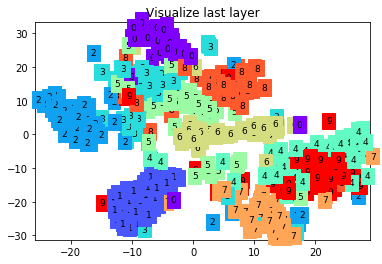

Epoch:  0 | train loss: 0.4526 | test accuracy: 0.82


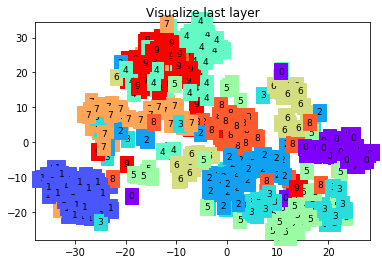

Epoch:  0 | train loss: 0.1928 | test accuracy: 0.89


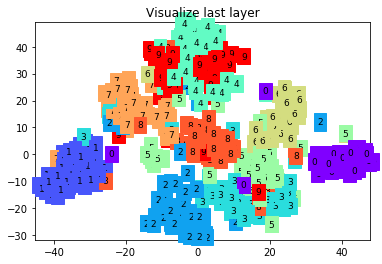

Epoch:  0 | train loss: 0.2569 | test accuracy: 0.92


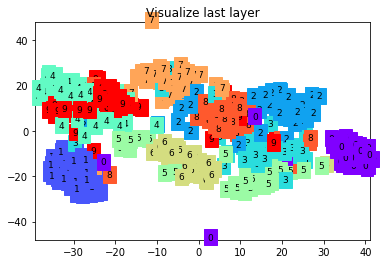

Epoch:  0 | train loss: 0.1221 | test accuracy: 0.93


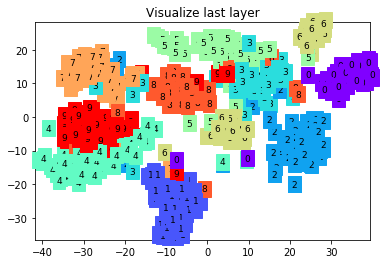

Epoch:  0 | train loss: 0.1621 | test accuracy: 0.94


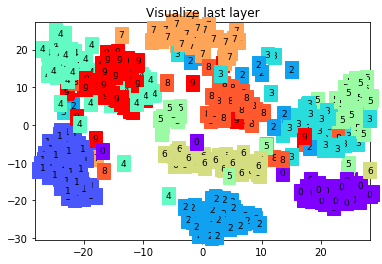

Epoch:  0 | train loss: 0.1504 | test accuracy: 0.95


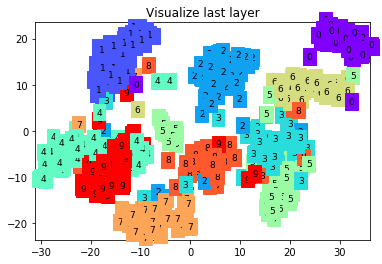

Epoch:  0 | train loss: 0.1616 | test accuracy: 0.96


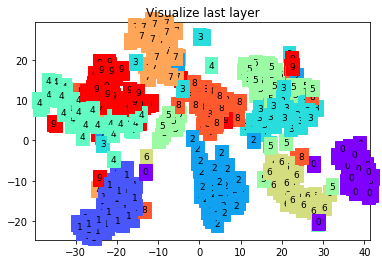

Epoch:  0 | train loss: 0.0436 | test accuracy: 0.95


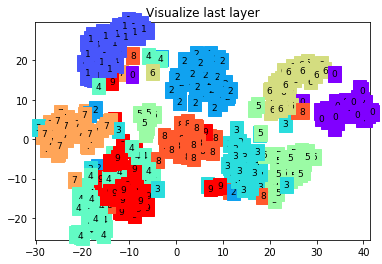

Epoch:  0 | train loss: 0.1669 | test accuracy: 0.96


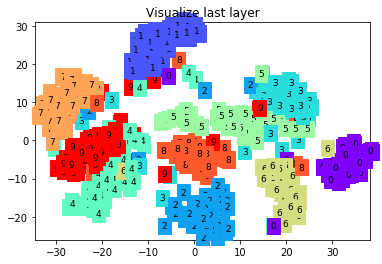

Epoch:  0 | train loss: 0.0177 | test accuracy: 0.96


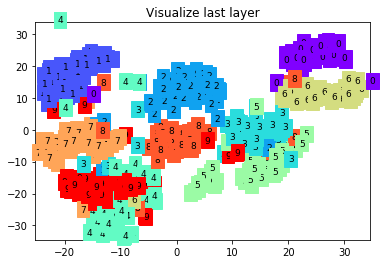

Epoch:  0 | train loss: 0.1814 | test accuracy: 0.97


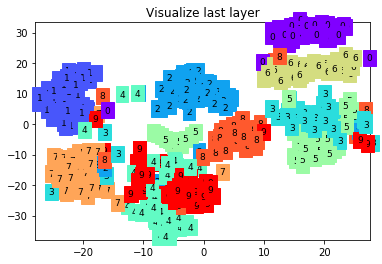

Epoch:  0 | train loss: 0.0717 | test accuracy: 0.96


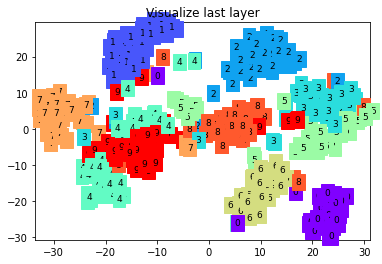

Epoch:  0 | train loss: 0.2311 | test accuracy: 0.98


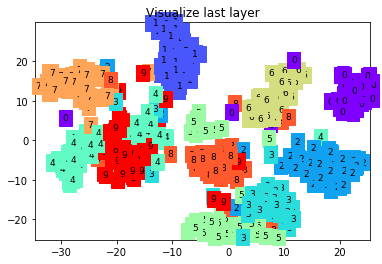

Epoch:  0 | train loss: 0.0396 | test accuracy: 0.98


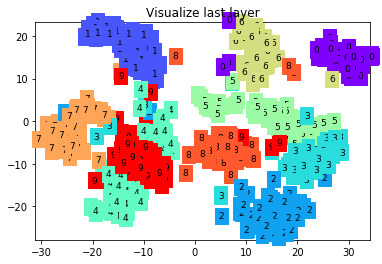

Epoch:  0 | train loss: 0.0275 | test accuracy: 0.97


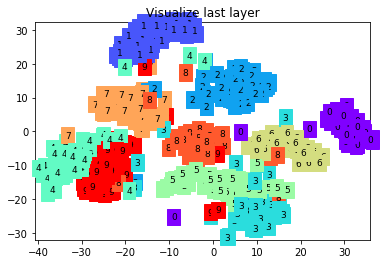

Epoch:  0 | train loss: 0.0508 | test accuracy: 0.97


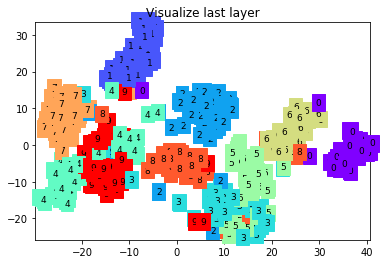

Epoch:  0 | train loss: 0.0877 | test accuracy: 0.97


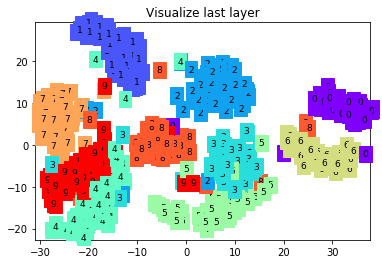

Epoch:  0 | train loss: 0.0205 | test accuracy: 0.97


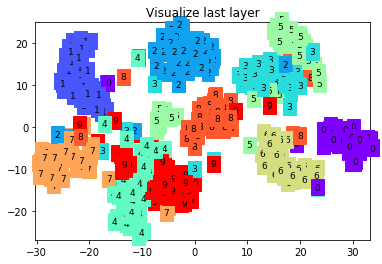

Epoch:  0 | train loss: 0.0236 | test accuracy: 0.97


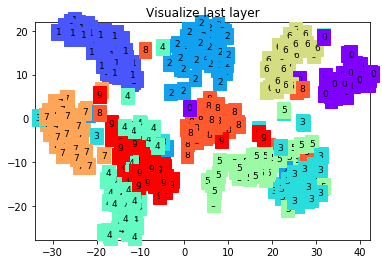

Epoch:  0 | train loss: 0.1297 | test accuracy: 0.98


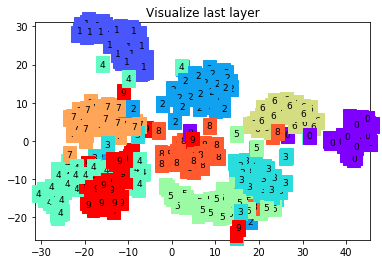

Epoch:  0 | train loss: 0.0587 | test accuracy: 0.98


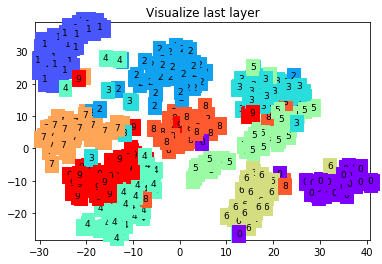

Epoch:  0 | train loss: 0.0164 | test accuracy: 0.98


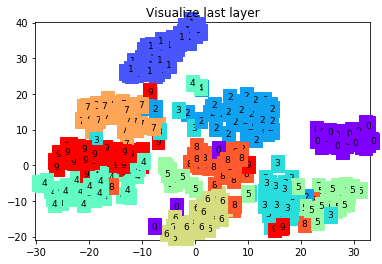

Epoch:  0 | train loss: 0.0599 | test accuracy: 0.98


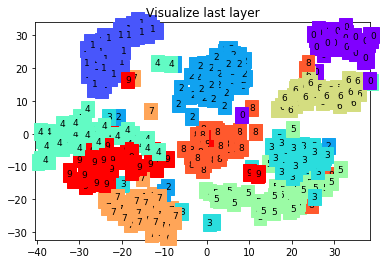

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes
              
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization


cnn = CNN()
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   

# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)
    
    
    
    
plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
#             if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
#                 tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
#                 plot_only = 500
#                 low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
#                 labels = test_y.numpy()[:plot_only]
#                 plot_with_labels(low_dim_embs, labels)
plt.ioff()

# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

# 3.2 cnn (with dropout)

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May 27 18:33:00 2019

@author: caoqun
"""
#import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F


EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate


DOWNLOAD_MNIST = True


train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
)
#
## plot one example
#print(train_data.train_data.size())                 # (60000, 28, 28)
#print(train_data.train_labels.size())               # (60000)
#plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
#plt.title('%i' % train_data.train_labels[0])
#plt.show()
#

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.dropout = nn.Dropout2d()
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = F.dropout(x, training=self.training)
        output = self.out(x)
        return output, x    # return x for visualization


cnn = CNN()
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)
    
    
    
    
plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
    
        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')